In [196]:
# u jupyteru Shift + Tab + Tab nam daje dokumentaciju 

import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from matplotlib import pyplot as plt

# pandas je biblioteka koja nam omogucava da radimo sa nekakvim tabelama
# sklearn je neka biblioteka za masinsko ucenje, mi ovde importujemo samo neke konkretne 
# funkcije jer su nam dovoljne

In [197]:
# u pd postoje dve osnovne strukture Series i Dataframe

# Series(serija) je jednodimenzioni niz, stim sto pored samih podataka imamo i nekakve indekse
# u ispisu, ona prva kolona levo su indeksi, ostalo su podaci
# pazimo da ono sto prosledimo konstruktoru bude niz, moramo [], generalno je tako za vecinu stvari u pandasu
pd.Series([1, 3, 6, 7, 10])

# indekse mozemo i sami da naglasimo (ali obavezno pazimo da ono sto prosledimo bude iste duzine kao niz u seriji)
s1 = pd.Series([1, 3, 6, 7, 10], index=['a', 'b', 'c', 'd', 'e'])
s2 = pd.Series([2, 4, 6, 8, 10])

# ocekivali bismo da ako saberemo s1 i s2 dobijemo niz iste dimenzije kao s1 i s2 gde su elementi na 
# istim pozicijama sabrani, ali ako samo ovako ostavimo sa nasim s1 i s2 dobicemo svugde NaN. To je zato
# sto ovo sabiranje ne ide bas po poziciji u nizu nego po pridruzenom indeksu (a mi u s1 imamo custom indekse)
print(s1 + s2)

s3 = pd.Series([1, 3, 6, 7, 10])
# ali kada su indeksi isti, lepo se izracuna kao sto ocekujemo
print(s2 + s3)

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64
0     3
1     7
2    12
3    15
4    20
dtype: int64


In [198]:
# iloc je skraceno od integer location, to nije metod nego clan, pa onda njega indeksiramo
# iloc nam daje pristup kao u obicnim nizovima na koje smo navikli, onaj element na poziciji [i]
print(s1.iloc[2])
# mozemo da radimo sve one stvari na koje smo navikli vec u pajtonu
print(s1.iloc[2:4])

6
c    6
d    7
dtype: int64


In [199]:
# ako imamo custom indekse, index ce vratiti Index objekat sa njima
print(s1.index)
print()
# a ako imamo one podrazumevane, bude ovako
print(s2.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

RangeIndex(start=0, stop=5, step=1)


In [200]:
# values vraca niz vrednosti(type(...) nam za to kaze da je to numpy array)
print(s1.values)

[ 1  3  6  7 10]


In [201]:
# metod koji nam vraca koliko podataka imamo za svaku vrednost koja se pojavljuje
print(s1.value_counts())

1     1
10    1
3     1
6     1
7     1
dtype: int64


In [202]:
# druga osnovna struktura u pandasu je Dataframe, mozemo rucno da ga pravimo, ali se sa ovim
# uglavnom radi tako sto se ucita iz nekog fajla
df1 = pd.DataFrame( [ [1,2,3], [4,5,6] ] )
print(df1)

# mozemo i ovde da damo neke nase nazive za indekse, ali ovde mozemo da stavimo i nase nazive za kolone
df2 = pd.DataFrame( data=[['pera',23], ['maja', 22]], columns=['ime', 'godine'] )
print(df2)

   0  1  2
0  1  2  3
1  4  5  6
    ime  godine
0  pera      23
1  maja      22


In [203]:
# mozemo napraviti DataFrame i od nekakve mape
people = {'ime' : pd.Series(['pera', 'maja']),
          'godine' : pd.Series([23, 22]) 
         }

df3 = pd.DataFrame(people)
print(df3)

    ime  godine
0  pera      23
1  maja      22


In [204]:
# poadaci o tipovima u dataframe-u
#integeri ce biti int64, a stringovi ce biti object
print(df3.dtypes)

ime       object
godine     int64
dtype: object


In [205]:
# mozemo da izvucemo celu kolonu (primetimo da ovo vraca pd.Series)
print(df3['ime'])
print(type(df3['ime']))

# iz serije naravno mozemo da izvucemo i neki pojedinacni element sa []
print(df3['ime'][0])

# primetimo da nije isto da dohvatamo kolonu sa [] i sa [[]], ovo drugo vraca pd.DataFrame
print(df3[['ime']])
print(type(df3[['ime']]))

0    pera
1    maja
Name: ime, dtype: object
<class 'pandas.core.series.Series'>
pera
    ime
0  pera
1  maja
<class 'pandas.core.frame.DataFrame'>


In [206]:
# one spoljasnje  [] su operator pristupa, u prvom slucaju mi smo prosledili jednu stvar, a u drugom smo
# kao prosledili niz sa jednim elementom. Mozemo proslediti vise kolona za dohvatanje ovako:
print(df3[['ime', 'godine']])

    ime  godine
0  pera      23
1  maja      22


In [207]:
# na DF isto mozemo da koristimo iloc, samo nece biti [][] nego  [i, j]
print(df3.iloc[0, 1]) 

23


In [208]:
# slicno kao iloc imamo loc. U iloc smo prosledjivali neke brojeve koji kao simuliraju poziciju u obicnoj 
# matrici, a u loc bas prosledjujemo indekse (ovo se lepo ilustruje kada imamo neke custom indekse)
df4 = pd.DataFrame( data=[['pera',23], ['maja', 22]], columns=['ime', 'godine'], index=['a','b'] )
print(df4.loc['a'])

ime       pera
godine      23
Name: a, dtype: object


In [209]:
# imamo jos jedan interesantan nacin da dohvatamo podatke, npr ovo je kao neko filtriranje
print(df3[ df3['godine'] > 22 ])
print()
print(df3[ df3['godine'] > 22 ]['ime'])
print()
print(df3[ df3['godine'] > 22 ][['ime']])


    ime  godine
0  pera      23

0    pera
Name: ime, dtype: object

    ime
0  pera


In [210]:
# ucitavanje podataka npr iz nekog fajla (imamo vise opcija, moze iz csv, iz excela itd (Tab za autocomplete))
# hocemo npr da ucitamo iris skup
df = pd.read_csv('../iris.csv')

# head nam vraca prbih nekoliko elemenata, cisto da bismo proverili da li je ucitano lepo
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [211]:
# describe nam vraca neke opisne statistike, koliko ih ima, srednje vrednosti itd itd
# ovde imamo samo numericke podatke 
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [212]:
# shape nam daje oblik podataka, prvi broj je broj instanc, drugi je broj kolona/atributa
df.shape

(150, 5)

In [213]:
# posto mi hocemo da radimo neko istrazivanje na ovim podacima, korisno je da proverimo da li imamo neke
# NaN vrednosti, dobicemo neki novi dataframe gde je True ako jeste NaN a false ako nije
# u iris skupu nemamo nijedan NaN
print(df.isna())

# a sa any mozemo da imamo kraci prikaz za svaki atribut
print(df.isna().any())

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]
Sepal_Length    False
Sepal_Width     False
Petal_Length    False
Petal_Width     False
Species         False
dtype: bool


In [214]:
# ako negde slucajno budemo imali NaN, a algoritam koji koristimo ne radi ako skup ima NaNove,
# mozemo jednostavno da samo izbacimo sve te podatke sa dropna() (ovde za iris to nema poente)
print(df.dropna())

# alternativno, mozemo da zamenimo NaN nekim vrednostima sa fillna()
print(df.fillna(0))

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
0             5.1          3.5           1.4          0.2     setosa
1         

In [215]:
# mozemo da vidimo korelaciju izmedju kolona. Moze se desiti da podaci koje dobijemo imaju dve kolone sa 
# skroz istim vrednostima, ako to bude slucaj, imacemo verednost 1 na tom mestu
print(df.corr())

              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.117570      0.871754     0.817941
Sepal_Width      -0.117570     1.000000     -0.428440    -0.366126
Petal_Length      0.871754    -0.428440      1.000000     0.962865
Petal_Width       0.817941    -0.366126      0.962865     1.000000


In [216]:
# obicno za klasifikaciju treba da nekako razdvojimo oone ciljne kategoricke atribute i ostale, 
# to mozemo ovako
feature_names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
X = df[ feature_names ]
y = df[ ['Species'] ]

In [217]:
# pre klasifikacije treba da podelimo na trening i test skup
# to mozemo lako sa funkcijom iz sklearn
# test_size ili train_size nam odredjuju procenat koji ide u taj skup, ostalo ide u drugi
# sa random_state mozemo da stavimo seed za generisanje slucajnih brojeva, ovo je korisno ako vise puta
# tokom razvoja zelimo da proverimo model nad skroz istom podelom na train i test
# sa shuffle=True mozemo da izmesamo podatke pre podele na skupove
# stratify moze da nam obezbedi da imamo i u trening i u test skupu podjednako zastupljene sve razlicite 
# klase koje mogu da se dobiju. Ako koristimo ovo, navodimo po cemu cemo da stratifikujemo. Za nas
# ce to biti po samom skupu y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(105, 4)
(45, 4)
(105, 1)
(105, 1)


In [218]:
# pravimo model, npr ovde stablo odlucivanja
# skoro sve klase iz sklearn imaju isti api, i slicno se koriste
# pogledaj opcione parametre za DecisionTreeClassifier konstruktor sa shift+tab+tab
model = DecisionTreeClassifier()

In [219]:
# fit izvrsava obucavanje
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [220]:
# mozemo da vidimo u koje klase nas model razvrstava
print(model.classes_)

# mozemo da vidimo koliko je koji atribut bio bitan pri klasifikaciji
print(model.feature_importances_)

['setosa' 'versicolor' 'virginica']
[0.03333333 0.         0.03641457 0.9302521 ]


In [221]:
# nakons to fitujemo, radimo predict da bismo proverili kako model radi
# predict ce nam vratiti niz predvidjenih klasa
# ovo treba da koristimo sa test podacima, ako koristimo sa train videcemo da model radi savrseno
y_train_predicted = model.predict(X_train)
# to da se sve poklapa mozemo da vidimo ovako sa accuracy score
print(accuracy_score(y_train, y_train_predicted))
# a mozemo i matricom konfuzije, imacemo nenula elemente samo na dijagonali, to znaci da su svi pravilno pogodjeni
print(confusion_matrix(y_train, y_train_predicted))

1.0
[[35  0  0]
 [ 0 35  0]
 [ 0  0 35]]


In [222]:
# a ovo je intended use, predvidjamo klase za test skup
y_test_predicted = model.predict(X_test)
print(accuracy_score(y_test, y_test_predicted))
print(confusion_matrix(y_test, y_test_predicted))

0.9555555555555556
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


In [223]:
# jos jedan nacin da ocenimo klasifikaciju je sa classification_report(). Tu dobijamo i preciznost i recall 
# i f1 meru itd
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



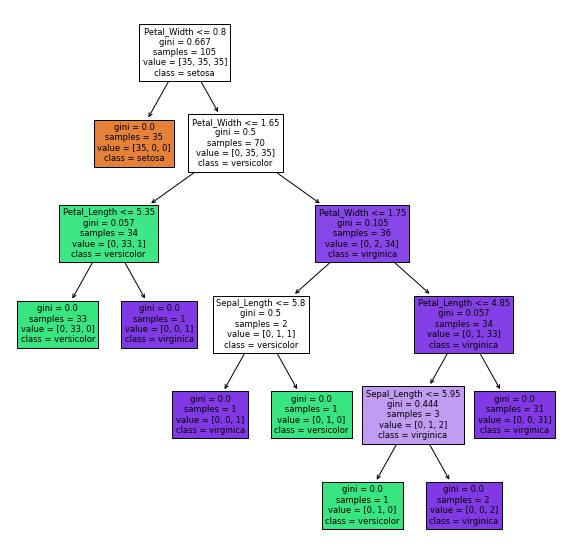

In [224]:
# ako zelimo da bas iscrtamo stablo odlucivanja iz naseg modela, treba nam tree modul iz sklearn
# ovo crtanje nije deo samog modela nego postoji nezavisno od njega, model je argument poziva
# feature_names opcioni parametar koristimo da nebi pisali redni brojevi atributa na crtezu
# nego bas ti prosledjeni, da bi bilo lepse
# class_names podesimo da bi bas videli imena klasa a ne neke redne brojeve
# filled=True nam daje obojene cvorove 

# ovo plt.figure i _ smo radili da bi slika bila veca i lepsa (pogledaj sta se dobije ako samo printujemo
# rezulat poziva plot_tree) (pogledaj i ispise bez ovih opcionih parametara)
plt.figure(figsize=(10, 10))
_ = tree.plot_tree(model, feature_names=feature_names, class_names=model.classes_, filled=True)

In [225]:
# CV iz GridSearch je skraceno od Cross Validation 
# kada ne se trudimo da nadjemo najbolje parametre za model (tipa ne znamo da li je bolje da radimo gini
# , ili entropiju, ili ne znamo sta je najbolje za neki drugi parametar), umesto da rucno pisemo sve moguce 
# kombinacije, mozemo da koristimo GridSeachCV. On ce za nas pronaci najbolje parametre za model tako sto ce
# da isproba sve kombinacije parametara koje mu trazimo

# parametre koje hocemod a isprobamo najlakse je da  ih unesemo u mapu i tako prosledimo GridSearchCV-u
# imena parametara odgovaraju onima koji postoje u DecisionTreeClassifier-u (tj u nekom drugom modelu,
# ako nismo koristili ovaj decision tree (ti parametri mogu da se vide u dokumentaciji za konkretan model))
params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [2, 3, 4],
          'min_samples_leaf' : [2, 4]}

# scoring mozemo da koristimo da naglasimo na osnovu cega poredimo modele koje GridSearchCV napravi. 
# Neke cesto koriscene ocene vec postoje ugradjene pa mogu da se proslede ovako kao string, a mozemo i da 
# napravimo neku nasu funkciju i onda nju da prosledimo
# cv parametar je za cross validaciju, kaze koliko slojeva imamo (po defaultu je 5 foldova)
# GridSearchCV na na kraju vrati najbolji model
model = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy', cv=6)

In [226]:
# sada taj dobijeni najbolji model mozemo da treniramo (sada koristimo ceo trening skup, a ne delimican 
# koji je bio koriscen tokom GridSearch-a zbog cross validacije)
model.fit(X_train, y_train)

# ovako vidimo koja kombinacija parametara je dala najbolji model
print(model.best_params_)

# tj mozemo i da vidimo te najbolje parametre i u kontekstu konkretnog tipa modela koji koristimo
print(model.best_estimator_)

# score za taj najbolji model (ovde je score accuracy jer smo tako naveli kao argument funkcije, ali moglo je i nesto drugo)
print(model.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}
DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)
0.952069716775599


In [228]:
# sada mozemo da vidimo kako se taj najbolji nadjen model ponasa na test skupu
y_predicted = model.predict(X_test)
print(accuracy_score(y_test, y_test_predicted))
print(confusion_matrix(y_test, y_test_predicted))

0.9555555555555556
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
